# Sklearn Tutorials from scratch

## 1. Train-Test Split using sklearn

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("500hits.csv", encoding='latin-1')

In [3]:
df.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [4]:
X = df.drop(columns = ['PLAYER', 'HOF'])
y = df['HOF']  

In [5]:
X.shape

(465, 14)

In [6]:
y.shape

(465,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 10)  #random_state allows your data to be the same for both split in different execution and test_size refers to how much percentage of the data you want to put in test set

In [8]:
X_train

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA
410,26,1781,6290,770,1748,300,79,45,0,515,214,117,0,0.278
81,20,2293,8288,1231,2365,412,55,185,1003,850,874,236,109,0.285
56,20,2317,8134,1751,2646,458,125,534,1922,1452,1311,87,72,0.325
336,16,2079,7064,1006,1885,338,14,294,1182,1075,1179,24,38,0.267
37,23,2896,10654,1232,2848,482,68,268,1357,860,990,28,22,0.267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,13,1552,5603,882,1818,399,110,181,997,520,553,94,0,0.324
320,18,1977,7023,986,1925,307,47,348,1239,666,1419,51,31,0.274
15,23,2973,11003,1669,3110,540,88,465,1834,1216,1686,223,96,0.283
125,16,1866,6573,901,2018,444,72,72,604,363,433,154,63,0.307


In [9]:
X_train.describe().round(3)

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA
count,372.000,372.000,372.000,372.000,372.000,372.000,372.000,372.000,372.000,372.000,372.000,372.000,372.000,372.000
mean,16.903,2033.575,7461.704,1139.976,2153.516,377.398,77.366,196.753,882.917,780.984,834.075,191.796,57.108,0.288
std,2.725,346.156,1271.493,280.582,417.855,94.943,48.262,139.660,476.185,319.919,481.684,182.326,48.733,0.021
min,11.000,1399.000,5472.000,601.000,1660.000,177.000,3.000,9.000,0.000,239.000,0.000,7.000,0.000,0.246
25%,15.000,1793.500,6504.500,930.000,1829.000,309.750,41.000,79.000,635.000,553.000,433.750,60.750,21.000,0.273
50%,17.000,1986.000,7199.500,1098.500,2049.500,361.500,67.000,169.500,959.000,729.000,790.000,135.500,51.000,0.287
75%,19.000,2212.250,8134.500,1284.750,2342.750,433.250,100.250,293.250,1196.500,943.500,1205.250,282.000,82.250,0.300
max,26.000,3308.000,11988.000,2295.000,4189.000,792.000,309.000,660.000,1922.000,2190.000,2597.000,1406.000,335.000,0.366


## Feature Scaling (Normalization vs Standardization) 
Feature Scaling: Feature scaling is the process of transforming features to be on a similar scale. This can be important for many machine learning algorithms that are sensitive to the scale of the input features.

i. Normalization: This technique rescales the features to a fixed range, usually [0, 1] or [-1, 1]. The most common method is Min-Max scaling. Normalization is often used when working with algorithms like Neural Networks or algorithms that use distance metrics like K-Nearest Neighbors (KNN) or Support Vector Machines (SVM) with certain kernels. The formula for it is : Xnorm = (X - Xmin) / (Xmax - Xmin) where X is the original feature and Xmin and Xmax are the minimum and maximum values of the features respectively. In scikit-learn, you can use MinMaxScaler for normalization.

ii. Standardization: If your algorithm assumes that the data is normally distributed (e.g., Linear Regression, Logistic Regression, or algorithms that involve regularization like Ridge or Lasso), standardization is appropriate. This technique scales the features to have a mean of 0 and a standard deviation of 1. It can handle outliers better because it scales data based on the mean and standard deviation rather than the min and max. This is also known as Z-score normalization. The formula is: Xstandard = (X - mean) / standard deviation. In scikit-learn, you can use StandardScaler for standardization.


In [10]:
df = df.drop(columns = ['PLAYER', 'CS'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YRS     465 non-null    int64  
 1   G       465 non-null    int64  
 2   AB      465 non-null    int64  
 3   R       465 non-null    int64  
 4   H       465 non-null    int64  
 5   2B      465 non-null    int64  
 6   3B      465 non-null    int64  
 7   HR      465 non-null    int64  
 8   RBI     465 non-null    int64  
 9   BB      465 non-null    int64  
 10  SO      465 non-null    int64  
 11  SB      465 non-null    int64  
 12  BA      465 non-null    float64
 13  HOF     465 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 51.0 KB


In [12]:
df.describe().round(3)

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
count,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000
mean,17.049,2048.699,7511.456,1150.314,2170.247,380.953,78.555,201.049,894.260,783.561,847.471,195.905,0.289,0.329
std,2.765,354.392,1294.066,289.635,424.191,96.483,49.363,143.623,486.193,327.432,489.224,181.846,0.021,0.475
min,11.000,1331.000,4981.000,601.000,1660.000,177.000,3.000,9.000,0.000,239.000,0.000,7.000,0.246,0.000
25%,15.000,1802.000,6523.000,936.000,1838.000,312.000,41.000,79.000,640.000,535.000,436.000,63.000,0.273,0.000
50%,17.000,1993.000,7241.000,1104.000,2076.000,366.000,67.000,178.000,968.000,736.000,825.000,137.000,0.287,0.000
75%,19.000,2247.000,8180.000,1296.000,2375.000,436.000,107.000,292.000,1206.000,955.000,1226.000,285.000,0.300,1.000
max,26.000,3308.000,12364.000,2295.000,4189.000,792.000,309.000,755.000,2297.000,2190.000,2597.000,1406.000,0.366,2.000


In [13]:
X1 = df.iloc[:, 0:13] #I dont want HOF to be selected for normaliztion or standardization. It selects all rows but only the columns from index 0 to 12(doesnt include 13th)

In [14]:
X2 = df.iloc[:, 0:13]

In [15]:
scaleStandard = StandardScaler()

In [16]:
X1_scaled = scaleStandard.fit_transform(X1)  #X1_scaled will be an Numpy array 

In [17]:
X1_scaled_df = pd.DataFrame(X1_scaled, columns = df.columns[0:13]) #converting the scaled feature to dataframe

In [18]:
X1_scaled_df.head()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA
0,2.516295,2.786078,3.034442,3.787062,4.764193,3.559333,4.389485,-0.585841,-0.346449,1.423013,-1.003628,3.832067,3.648290
1,1.792237,2.760655,2.677044,2.760530,3.444971,3.569709,1.996457,1.909487,2.175837,2.493089,-0.309948,-0.649080,1.996159
2,1.792237,2.091184,2.075964,2.528955,3.171214,4.264876,2.909053,-0.585841,-0.350567,1.826585,-1.283965,1.299723,2.657012
3,1.068180,1.972543,2.849554,2.670665,3.055576,1.691719,-0.254611,0.410896,0.858071,0.912434,2.030966,0.892346,1.004881
4,1.430208,2.099658,2.257758,2.024329,2.972977,2.687780,3.517449,-0.697364,-1.841290,0.548609,-1.065016,2.896201,1.901752


In [19]:
X1_scaled_df.describe().round(3)

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA
count,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.190,-2.027,-1.958,-1.899,-1.204,-2.116,-1.532,-1.339,-1.841,-1.665,-1.734,-1.040,-2.016
25%,-0.742,-0.697,-0.765,-0.741,-0.784,-0.715,-0.762,-0.851,-0.524,-0.760,-0.842,-0.732,-0.742
50%,-0.018,-0.157,-0.209,-0.160,-0.222,-0.155,-0.234,-0.161,0.152,-0.145,-0.046,-0.324,-0.081
75%,0.706,0.560,0.517,0.504,0.483,0.571,0.577,0.634,0.642,0.524,0.775,0.490,0.533
max,3.240,3.557,3.754,3.956,4.764,4.265,4.673,3.861,2.888,4.300,3.580,6.662,3.648


In [20]:
scaleMinMax = MinMaxScaler(feature_range = (0,1))

In [21]:
X2_scaled = scaleMinMax.fit_transform(X2)

In [22]:
X2_scaled_df = pd.DataFrame(X2_scaled, columns = df.columns[0:13])

In [23]:
X2_scaled_df

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA
0,0.866667,0.861912,0.874035,0.971074,1.000000,0.889431,0.954248,0.144772,0.316064,0.517683,0.137466,0.632595,1.000000
1,0.733333,0.857360,0.811459,0.795750,0.778964,0.891057,0.568627,0.624665,0.849369,0.697078,0.268002,0.050751,0.708333
2,0.733333,0.737481,0.706217,0.756198,0.733096,1.000000,0.715686,0.144772,0.315194,0.585341,0.084713,0.303788,0.825000
3,0.600000,0.716237,0.841663,0.780401,0.713721,0.596748,0.205882,0.336461,0.570744,0.432086,0.708510,0.250893,0.533333
4,0.666667,0.738998,0.738047,0.670012,0.699881,0.752846,0.813725,0.123324,0.000000,0.371092,0.125915,0.511079,0.691667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,0.266667,0.297926,0.226466,0.297521,0.001977,0.175610,0.117647,0.378016,0.419678,0.504869,0.549480,0.155826,0.033333
461,0.400000,0.251897,0.150481,0.176505,0.001582,0.328455,0.022876,0.356568,0.463648,0.357253,0.559492,0.009292,0.225000
462,0.266667,0.254426,0.205607,0.272137,0.000395,0.261789,0.209150,0.269437,0.331302,0.369554,0.458221,0.220157,0.083333
463,0.333333,0.248356,0.179873,0.066706,0.000000,0.125203,0.071895,0.060322,0.258163,0.080472,0.188294,0.047891,0.141667


In [24]:
X2_scaled_df.describe().round(3)

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA
count,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000
mean,0.403,0.363,0.343,0.324,0.202,0.332,0.247,0.257,0.389,0.279,0.326,0.135,0.356
std,0.184,0.179,0.175,0.171,0.168,0.157,0.161,0.193,0.212,0.168,0.188,0.130,0.177
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.267,0.238,0.209,0.198,0.070,0.220,0.124,0.094,0.279,0.152,0.168,0.040,0.225
50%,0.400,0.335,0.306,0.297,0.164,0.307,0.209,0.227,0.421,0.255,0.318,0.093,0.342
75%,0.533,0.463,0.433,0.410,0.283,0.421,0.340,0.379,0.525,0.367,0.472,0.199,0.450
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## One hot encoder
One hot encoding is a technique used to convert categorical variables into a numerical format that can be used by machine learning algorithms. This method creates binary columns for each category in the original feature.

In [25]:
d = {'sales': [100000,222000,1000000,522000,111111,222222,1111111,20000,75000,90000,1000000,10000], 
     'city': ['Tampa','Tampa','Orlando','Jacksonville','Miami','Jacksonville','Miami','Miami','Orlando','Orlando','Orlando','Orlando'],
     'size': ['Small', 'Medium','Large','Large','Small','Medium','Large','Small','Medium','Medium','Medium','Small',]}

In [26]:
df_d = pd.DataFrame(data = d)

In [27]:
df_d.head()

,sales,city,size
0,100000,Tampa,Small
1,222000,Tampa,Medium
2,1000000,Orlando,Large
3,522000,Jacksonville,Large
4,111111,Miami,Small


In [28]:
df_d['city'].unique()

array(['Tampa', 'Orlando', 'Jacksonville', 'Miami'], dtype=object)

In [29]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform='pandas')

In [30]:
ohe_transform = ohe.fit_transform(df_d[['city']])

In [31]:
ohe_transform.head()

,city_Jacksonville,city_Miami,city_Orlando,city_Tampa
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [32]:
df_d = pd.concat([df_d, ohe_transform], axis = 1).drop(columns = ['city']) #concatenates the dataframe df_d and ohe_transform along the columns and remove the column named city and store it in df_d dataframe

In [33]:
df_d.head()

,sales,size,city_Jacksonville,city_Miami,city_Orlando,city_Tampa
0,100000,Small,0.0,0.0,0.0,1.0
1,222000,Medium,0.0,0.0,0.0,1.0
2,1000000,Large,0.0,0.0,1.0,0.0
3,522000,Large,1.0,0.0,0.0,0.0
4,111111,Small,0.0,1.0,0.0,0.0


## Ordinal Encoder
The OrdinalEncoder is a class from scikit-learn used to encode categorical features into ordinal integers.Ordinal encoding involves converting categorical variables into numerical values where the order of the values reflects the natural ordering of the categories. Each category is assigned a unique integer, starting from 0 up to 𝑛 − 1, where  n is the number of unique categories. Use ordinal encoding when your categorical feature has an ordinal relationship, meaning the categories have a meaningful order or ranking. For example, educational levels like High School, Bachelor's, Master's, and Ph.D. have a clear order.

In [34]:
df_d1 = pd.DataFrame(data = d)

In [35]:
df_d1.head(10)

,sales,city,size
0,100000,Tampa,Small
1,222000,Tampa,Medium
2,1000000,Orlando,Large
3,522000,Jacksonville,Large
4,111111,Miami,Small
5,222222,Jacksonville,Medium
6,1111111,Miami,Large
7,20000,Miami,Small
8,75000,Orlando,Medium
9,90000,Orlando,Medium


In [36]:
df_d1['size'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [37]:
sizes =['Small', 'Medium', 'Large']

In [38]:
oe = OrdinalEncoder(categories = [sizes])

In [39]:
oe.fit_transform(df_d1[['size']])

array([[0.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.]])

In [40]:
df_d1['size'] = oe.fit_transform(df_d1[['size']])

In [41]:
df_d1.head()

,sales,city,size
0,100000,Tampa,0.0
1,222000,Tampa,1.0
2,1000000,Orlando,2.0
3,522000,Jacksonville,2.0
4,111111,Miami,0.0


## Handling missing values
You need to specify the strategy for imputing missing values. Common strategies include:

1. 'mean': Replace missing values with the mean of the column.
2. 'median': Replace missing values with the median of the column.
3. 'most_frequent': Replace missing values with the most frequent value in the column.
4. 'constant': Replace missing values with a constant value that you specify.

In [42]:
miles = pd.DataFrame({'farthest_run_mi' : [50, 62, np.nan, 100, 26, 13, 31, 50]})

In [43]:
miles

,farthest_run_mi
0,50.0
1,62.0
2,NaN
3,100.0
4,26.0
5,13.0
6,31.0
7,50.0


In [44]:
miles.isna()

,farthest_run_mi
0,False
1,False
2,True
3,False
4,False
5,False
6,False
7,False


In [45]:
imp_mean = SimpleImputer(strategy = 'mean')

In [46]:
imp_mean.fit_transform(miles)  #the missing value will be replaced by the mean of that column

array([[ 50.        ],
       [ 62.        ],
       [ 47.42857143],
       [100.        ],
       [ 26.        ],
       [ 13.        ],
       [ 31.        ],
       [ 50.        ]])

In [47]:
imp_median = SimpleImputer(strategy = 'median')

In [48]:
imp_median.fit_transform(miles)

array([[ 50.],
       [ 62.],
       [ 50.],
       [100.],
       [ 26.],
       [ 13.],
       [ 31.],
       [ 50.]])

In [49]:
imp_mode = SimpleImputer(strategy = 'most_frequent')

In [50]:
imp_mode.fit_transform(miles)

array([[ 50.],
       [ 62.],
       [ 50.],
       [100.],
       [ 26.],
       [ 13.],
       [ 31.],
       [ 50.]])

In [51]:
imp_constant = SimpleImputer(strategy = 'constant', fill_value = 13)

In [52]:
imp_constant.fit_transform(miles)

array([[ 50.],
       [ 62.],
       [ 13.],
       [100.],
       [ 26.],
       [ 13.],
       [ 31.],
       [ 50.]])

In [53]:
#using imputer for handling missing values in categorical data
names = pd.DataFrame({'names': ['Salon', 'Raut', 'Nitul',' Tako',np.nan,'Thapa']})

In [54]:
names

,names
0,Salon
1,Raut
2,Nitul
3,Tako
4,NaN
5,Thapa


In [55]:
imp_constant_cat = SimpleImputer(strategy = 'constant', fill_value = 'Trilok')

In [56]:
imp_constant_cat.fit_transform(names)

array([['Salon'],
       ['Raut'],
       ['Nitul'],
       [' Tako'],
       ['Trilok'],
       ['Thapa']], dtype=object)

In [57]:
#To know which value has been simple imputed we will do the following:
imp_mean_marked = SimpleImputer(strategy = 'mean', add_indicator = True)

In [58]:
imp_mean_marked.fit_transform(miles)  #it will generate an extra column where there are values 0 and 1 indicating that not imputed values and imputed value respectively

array([[ 50.        ,   0.        ],
       [ 62.        ,   0.        ],
       [ 47.42857143,   1.        ],
       [100.        ,   0.        ],
       [ 26.        ,   0.        ],
       [ 13.        ,   0.        ],
       [ 31.        ,   0.        ],
       [ 50.        ,   0.        ]])

In [59]:
new_df = pd.DataFrame({'Name' : ['Salon', 'Raut', 'Nitul',' Tako','Ttvai',np.nan,'Thapa', 'Pranaya'],
                       'farthest_run_mi' : [50, 62, np.nan, 100, 26, 13, 31, 50]})

In [60]:
new_df

,Name,farthest_run_mi
0,Salon,50.0
1,Raut,62.0
2,Nitul,NaN
3,Tako,100.0
4,Ttvai,26.0
5,NaN,13.0
6,Thapa,31.0
7,Pranaya,50.0


In [61]:
from sklearn.compose import make_column_transformer

In [62]:
ct = make_column_transformer(
    (imp_constant_cat, ['Name']),
    (imp_mean, ['farthest_run_mi']),
    remainder = 'drop'
) #remainder = 'drop' will drop all the columns except Name and farthest_run_mi

In [63]:
ct.set_output(transform = 'pandas')

ColumnTransformer(transformers=[('simpleimputer-1',
                                 SimpleImputer(fill_value='Trilok',
                                               strategy='constant'),
                                 ['Name']),
                                ('simpleimputer-2', SimpleImputer(),
                                 ['farthest_run_mi'])])

In [64]:
df_pandas = ct.fit_transform(new_df)

In [65]:
df_pandas

,simpleimputer-1__Name,simpleimputer-2__farthest_run_mi
0,Salon,50.000000
1,Raut,62.000000
2,Nitul,47.428571
3,Tako,100.000000
4,Ttvai,26.000000
5,Trilok,13.000000
6,Thapa,31.000000
7,Pranaya,50.000000


## Column Transformer: 
The ColumnTransformer class in scikit-learn is a powerful tool for preprocessing different columns in a dataset using different transformers. It is particularly useful when you have a mix of feature types (e.g., numerical and categorical) and need to apply different preprocessing steps to each type.

In [66]:
data1 = {'sales': [100000,222000,1000000,522000,111111,222222,1111111,20000,75000,90000,1000000,10000], 
     'city': ['Tampa','Tampa','Orlando','Jacksonville','Miami','Jacksonville','Miami','Miami','Orlando','Orlando','Orlando','Orlando'],
     'size': ['Small', 'Medium','Large','Large','Small','Medium','Large','Small','Medium','Medium','Medium','Small',]}

In [67]:
dataframe1 = pd.DataFrame(data = data1)

In [68]:
dataframe1

,sales,city,size
0,100000,Tampa,Small
1,222000,Tampa,Medium
2,1000000,Orlando,Large
3,522000,Jacksonville,Large
4,111111,Miami,Small
5,222222,Jacksonville,Medium
6,1111111,Miami,Large
7,20000,Miami,Small
8,75000,Orlando,Medium
9,90000,Orlando,Medium


In [69]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [70]:
ohe1 = OneHotEncoder(sparse_output = False) #sparse_output = False will create an pandas dataframe

In [71]:
ode = OrdinalEncoder()

In [72]:
ct1 = make_column_transformer(
    (ohe, ['city']),
    (ode, ['size']),
    remainder = 'passthrough'
)

In [73]:
ct1.set_output(transform ='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['city']),
                                ('ordinalencoder', OrdinalEncoder(), ['size'])])

In [74]:
dataframe1_pandas = ct1.fit_transform(dataframe1)

In [75]:
 dataframe1_pandas

,onehotencoder__city_Jacksonville,onehotencoder__city_Miami,onehotencoder__city_Orlando,onehotencoder__city_Tampa,ordinalencoder__size,remainder__sales
0,0.0,0.0,0.0,1.0,2.0,100000
1,0.0,0.0,0.0,1.0,1.0,222000
2,0.0,0.0,1.0,0.0,0.0,1000000
3,1.0,0.0,0.0,0.0,0.0,522000
4,0.0,1.0,0.0,0.0,2.0,111111
5,1.0,0.0,0.0,0.0,1.0,222222
6,0.0,1.0,0.0,0.0,0.0,1111111
7,0.0,1.0,0.0,0.0,2.0,20000
8,0.0,0.0,1.0,0.0,1.0,75000
9,0.0,0.0,1.0,0.0,1.0,90000


In [76]:
ct2 = make_column_transformer(
    (ohe, ['city']),
    ('passthrough', ['size']),  #size column will be passed through without any transformation. This is typically used for columns that you don’t want to change or modify, but still want to include in the final output.
    remainder = 'drop'
)

In [77]:
ct2.set_output(transform = 'pandas')

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['city']),
                                ('passthrough', 'passthrough', ['size'])])

In [78]:
dataframe2_pandas = ct2.fit_transform(dataframe1)

In [79]:
dataframe2_pandas

,onehotencoder__city_Jacksonville,onehotencoder__city_Miami,onehotencoder__city_Orlando,onehotencoder__city_Tampa,passthrough__size
0,0.0,0.0,0.0,1.0,Small
1,0.0,0.0,0.0,1.0,Medium
2,0.0,0.0,1.0,0.0,Large
3,1.0,0.0,0.0,0.0,Large
4,0.0,1.0,0.0,0.0,Small
5,1.0,0.0,0.0,0.0,Medium
6,0.0,1.0,0.0,0.0,Large
7,0.0,1.0,0.0,0.0,Small
8,0.0,0.0,1.0,0.0,Medium
9,0.0,0.0,1.0,0.0,Medium


## K-nearest Neighbours
k-Nearest Neighbors (k-NN) is a simple, intuitive machine learning algorithm used for classification and regression. It operates on the principle that similar data points are located close to each other in the feature space. Here’s a breakdown of how it works:

Concept: For a given data point that you want to classify or predict, the k-NN algorithm looks at the 'k' nearest data points in the training dataset. It then makes a prediction based on the majority class (for classification) or average value (for regression) of these k-nearest neighbors.

Classification: If you are using k-NN for classification, the algorithm determines the class of the new data point by taking a vote among its k nearest neighbors. The class that appears most frequently among these neighbors is assigned to the new data point.

Regression: If you are using k-NN for regression, the algorithm predicts the value of the new data point by averaging the values of its k nearest neighbors.

In [80]:
wine = datasets.load_wine()

In [81]:
dataframe3 = pd.DataFrame(data = wine.data, columns = wine.feature_names)

In [82]:
dataframe3

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [83]:
#without preprocessing
X_train,X_test, y_train, y_test = train_test_split(wine.data,wine.target, test_size = 0.3)

In [84]:
#model for  k=5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [85]:
y_pred = knn.predict(X_test)

In [86]:
print(f'Accuracy: {metrics.accuracy_score(y_test,y_pred)}')

Accuracy: 0.6851851851851852


In [87]:
#after preprocessing
scaler1 = MinMaxScaler()
scaler1.fit(wine.data)
normalized_temp = scaler1.fit_transform(wine.data)
print(normalized_temp[:5])

[[0.84210526 0.1916996  0.57219251 0.25773196 0.61956522 0.62758621
  0.57383966 0.28301887 0.59305994 0.37201365 0.45528455 0.97069597
  0.56134094]
 [0.57105263 0.2055336  0.4171123  0.03092784 0.32608696 0.57586207
  0.51054852 0.24528302 0.27444795 0.26450512 0.46341463 0.78021978
  0.55064194]
 [0.56052632 0.3201581  0.70053476 0.41237113 0.33695652 0.62758621
  0.61181435 0.32075472 0.75709779 0.37542662 0.44715447 0.6959707
  0.64693295]
 [0.87894737 0.23913043 0.60962567 0.31958763 0.4673913  0.98965517
  0.66455696 0.20754717 0.55835962 0.55631399 0.30894309 0.7985348
  0.85734665]
 [0.58157895 0.36561265 0.80748663 0.53608247 0.52173913 0.62758621
  0.49578059 0.49056604 0.44479495 0.25938567 0.45528455 0.60805861
  0.32596291]]


In [88]:
X_train,X_test, y_train, y_test = train_test_split(normalized_temp,wine.target, test_size = 0.3)

In [89]:
knn1 = KNeighborsClassifier(n_neighbors = 7)
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [90]:
y_pred1 = knn1.predict(X_test)

In [91]:
print(f'Accuracy: {metrics.accuracy_score(y_test,y_pred1)}')

Accuracy: 1.0


In [92]:
cm = confusion_matrix(y_test,y_pred1)

In [93]:
print(cm)

[[15  0  0]
 [ 0 19  0]
 [ 0  0 20]]


In [94]:
cr = classification_report(y_test,y_pred1)

In [95]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        20

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



## Decision Trees: 
A Decision Tree is a versatile and intuitive supervised learning algorithm used for both classification and regression tasks. It works by splitting the data into subsets based on feature values, creating a tree-like structure of decisions. They can handle both numerical and categorical data. They do not require normalization or standardization of features.

In [96]:
dataframe4 = pd.read_csv("500hits.csv", encoding='latin-1')

In [97]:
dataframe4.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [98]:
dataframe4 =dataframe4.drop(columns = ['PLAYER', 'CS'])

In [99]:
X = dataframe4.iloc[: , 0:13]
y = dataframe4.iloc[: , 13]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 17, test_size = 0.2)

In [101]:
from sklearn.tree import DecisionTreeClassifier 

In [102]:
dtc = DecisionTreeClassifier()

In [103]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [104]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [105]:
y_pred = dtc.predict(X_test)

In [106]:
print(confusion_matrix(y_test, y_pred))

[[50 11]
 [11 21]]


In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        61
           1       0.66      0.66      0.66        32

    accuracy                           0.76        93
   macro avg       0.74      0.74      0.74        93
weighted avg       0.76      0.76      0.76        93



In [108]:
dtc.feature_importances_ #gives the degree of importance of each features

array([0.        , 0.0154869 , 0.04807185, 0.02714491, 0.39718629,
       0.06589131, 0.01565832, 0.04585115, 0.05434852, 0.12171401,
       0.04036804, 0.03573274, 0.13254597])

In [109]:
X.columns

Index(['YRS', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'SB',
       'BA'],
      dtype='object')

In [110]:
features = pd.DataFrame(dtc.feature_importances_ , index = X.columns )

In [111]:
features.head(15)

,0
YRS,0.000000
G,0.015487
AB,0.048072
R,0.027145
H,0.397186
2B,0.065891
3B,0.015658
HR,0.045851
RBI,0.054349
BB,0.121714


In [112]:
dtc2 = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.04) #ccp_alpha helps if model is overfitting

In [113]:
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy')

In [114]:
y_pred2 = dtc2.predict(X_test)

In [115]:
print(confusion_matrix(y_test, y_pred2))

[[50 11]
 [ 9 23]]


In [116]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83        61
           1       0.68      0.72      0.70        32

    accuracy                           0.78        93
   macro avg       0.76      0.77      0.77        93
weighted avg       0.79      0.78      0.79        93



In [117]:
dtc2.feature_importances_ 

array([0.        , 0.        , 0.        , 0.        , 0.83797743,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.16202257])

In [118]:
features2 = pd.DataFrame(dtc2.feature_importances_ , index = X.columns )

In [119]:
features2.head(15)

,0
YRS,0.000000
G,0.000000
AB,0.000000
R,0.000000
H,0.837977
2B,0.000000
3B,0.000000
HR,0.000000
RBI,0.000000
BB,0.000000


## Naive-Baye's Algorithm: 
Used for classification problem statement. Based on Baye's theorem which is used to calculate the probabilty of one event when another event has already occurred.


In [120]:
titanicdf = pd.read_csv('titanic.csv')

In [121]:
titanicdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [122]:
titanicdf.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket','Cabin', 'Embarked'], axis = 'columns', inplace = True)

In [123]:
titanicdf

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [124]:
target = titanicdf.Survived
inputs = titanicdf.drop('Survived', axis = 'columns')

In [125]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,False,True
1,True,False
2,True,False


In [126]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False


In [127]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,False
1,1,38.0,71.2833,True
2,3,26.0,7.9250,True


In [128]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [129]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,False
1,1,38.0,71.2833,True
2,3,26.0,7.9250,True
3,1,35.0,53.1000,True
4,3,35.0,8.0500,False


In [130]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [131]:
model = GaussianNB()

In [132]:
model.fit(X_train,y_train)

GaussianNB()

In [133]:
model.score(X_test,y_test)

0.746268656716418

In [134]:
X_test[0:10]

,Pclass,Age,Fare,female
165,3,9.000000,20.5250,False
166,1,29.699118,55.0000,True
91,3,20.000000,7.8542,False
217,2,42.000000,27.0000,False
872,1,33.000000,5.0000,False
227,3,20.500000,7.2500,False
320,3,22.000000,7.2500,False
88,1,23.000000,263.0000,True
771,3,48.000000,7.8542,False
160,3,44.000000,16.1000,False


In [135]:
y_test[0:10]

165    1
166    1
91     0
217    0
872    0
227    0
320    0
88     1
771    0
160    0
Name: Survived, dtype: int64

In [136]:
model.predict(X_test[0:10])

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [137]:
model.predict_proba(X_test[:10])

array([[9.53160098e-01, 4.68399024e-02],
       [3.00086474e-02, 9.69991353e-01],
       [9.65451106e-01, 3.45488944e-02],
       [9.28538649e-01, 7.14613510e-02],
       [7.87271982e-01, 2.12728018e-01],
       [9.65689569e-01, 3.43104309e-02],
       [9.66629951e-01, 3.33700487e-02],
       [6.62241060e-13, 1.00000000e+00],
       [9.66780538e-01, 3.32194622e-02],
       [9.69069858e-01, 3.09301423e-02]])

In [138]:
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.808     , 0.84      , 0.8       , 0.77419355, 0.71774194])

## Support Vector Machines

Support Vector Machines (SVM) are a powerful set of supervised learning algorithms used for both classification and regression tasks. SVMs are primarily used for classification problems but can also be used in regression problems (SVR). SVM draws a hyper plane in n dimensional space such that it maximizes margin between classification groups. The core idea of SVM is to find a hyperplane that best separates the data into different classes.

### Key Concepts

1. **Hyperplane**: In an n-dimensional space, a hyperplane is an (n-1)-dimensional flat affine subspace. For a 2D space, it is a line; for a 3D space, it is a plane. The goal of SVM is to find the hyperplane that best divides the dataset into two classes.

2. **Support Vectors**: These are the data points that are closest to the hyperplane. These points are critical in determining the position and orientation of the hyperplane. In other words, the support vectors are the data points that lie on the edge of the margin, which is the space between the two classes that the hyperplane is trying to separate.

3. **Margin**: This is the distance between the hyperplane and the nearest data points from either class. SVM tries to maximize this margin, which means the hyperplane is chosen in such a way that it is as far away as possible from the nearest data points of both classes. A large margin indicates a good separation between classes.

4. **Kernel Trick**: When the data is not linearly separable in the original feature space, SVM can transform the input space into a higher-dimensional space using a kernel function. This transformation makes it easier to find a hyperplane that separates the classes. Common kernel functions include:
   
   - **Linear Kernel**: Used for linearly separable data.
   - **Polynomial Kernel**: Used for data that is polynomially separable.
   - **Radial Basis Function (RBF) Kernel**: A popular choice for non-linear data, it maps the input space into an infinite-dimensional space.
   - **Sigmoid Kernel**: Similar to a neural network with a single hidden layer.
   
5. **C Parameter**: The C parameter / regularization parameter controls the trade-off between achieving a low error on the training data and maximizing the margin. A smaller C value creates a larger margin hyperplane, which may result in more misclassifications but aims to generalize better. A larger C value aims to classify all training points correctly but may not generalize well (might overfit the model).

6. **Gamma Parameter (for RBF Kernel)**: Gamma defines how far the influence of a single training example reaches. Low gamma means far, and high gamma means close. If gamma is too large, the decision boundary is too sensitive to noise in the training data.


In [139]:
from sklearn.datasets import load_iris
iris = load_iris()

In [140]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [141]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [142]:
irisdf = pd.DataFrame(iris.data, columns = iris.feature_names)

In [143]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [144]:
irisdf['target'] = iris.target
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [145]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [146]:
irisdf[irisdf.target == 1].head() #from this we know that from 0-49 its setosa from 50 to 99 its versicolor and from 100 to 150 its virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [147]:
irisdf['flower_name'] = irisdf.target.apply(lambda x:iris.target_names[x]) 

In [148]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [149]:
irisdf0 = irisdf[irisdf.target == 0]
irisdf1 = irisdf[irisdf.target == 1]
irisdf2 = irisdf[irisdf.target == 2]

In [150]:
irisdf0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [151]:
from matplotlib import pyplot as plt

In [152]:
%matplotlib inline

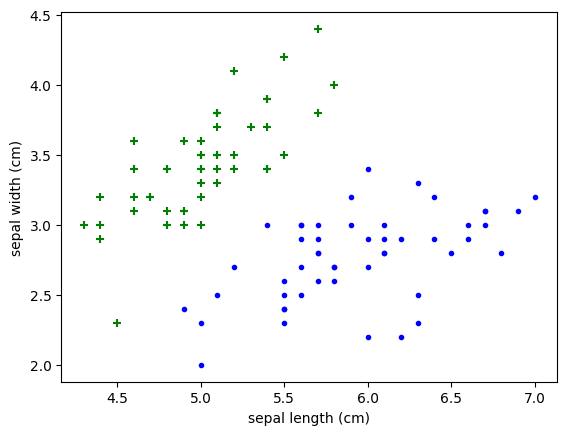

In [153]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(irisdf0['sepal length (cm)'],irisdf0['sepal width (cm)'], color= 'green',marker = '+')
plt.scatter(irisdf1['sepal length (cm)'],irisdf1['sepal width (cm)'], color= 'blue',marker = '.')

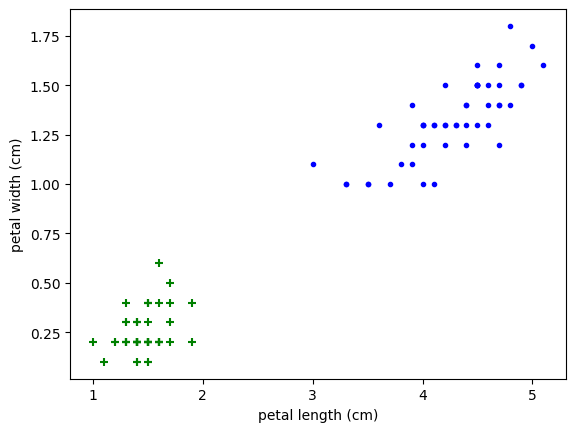

In [154]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(irisdf0['petal length (cm)'],irisdf0['petal width (cm)'], color= 'green',marker = '+')
plt.scatter(irisdf1['petal length (cm)'],irisdf1['petal width (cm)'], color= 'blue',marker = '.')

In [165]:
X = irisdf.drop(['target','flower_name'], axis = 'columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [166]:
y=irisdf.target

In [167]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [171]:
model = SVC(kernel = 'linear')

In [172]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [173]:
model.score(X_test, y_test)

0.9666666666666667